## Introdução e preliminares 
pg 61 em diante


In [1]:
%matplotlib inline
from IPython import display 
from mxnet import np, npx 
from d2l import mxnet as d2l

npx.set_np()

def f(x):
	return 3*x**2-4*x

In [2]:
def numerical_lim(f,x,h):
    return (f(x+h)-f(x))/h
h=0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f,1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [3]:
def use_svg_display(): #@save
	"""Use the svg format to display a plot in Jupyter."""
	display.set_matplotlib_formats('svg')
    

In [4]:
def set_figsize(figsize=(3.5,2.5)): #@save
	"""Set the figure size for matplotlib."""
	use_svg_display()
	d2l.plt.rcParams['figure.figsize']=figsize
    

In [5]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
	"""Set the axes for matplotlib."""
	axes.set_xlabel(xlabel)
	axes.set_ylabel(ylabel)
	axes.set_xscale(xscale)
	axes.set_yscale(yscale)
	axes.set_xlim(xlim)
	axes.set_ylim(ylim)
	if legend:
		axes.legend(legend)
	axes.grid()
    

In [6]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
		ylim=None, xscale='linear', yscale='linear',fmts=('-','m--','g-.','r:'), figsize=(3.5,2.5), axes=None):
	"""Plot data points."""
	if legend is None:
		legend=[]
	set_figsize(figsize)
	axes=axes if axes else d2l.plt.gca()
	
	# Return True if `X` (tensor or list) has 1 axis
	def has_one_axis(X):
		return(hasattr(X,"ndim") and X.ndim==1 or
		isinstance(X,list) and not hasattr(X[0],"__len__"))
	if has_one_axis(X):
		X=[X]
	if Y is None:
		X, Y=[[]]*len(X), X
	elif has_one_axis(Y):
		Y=[Y]
	if len(X)!=len(Y):
		X=X*len(Y)
	axes.cla()
	for x, y, fmt in zip(X, Y, fmts):
		if len(x):
			axes.plot(x, y, fmt)
		else:
			axes.plot(y, fmt)
	set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

[15:51:30] /home/mertins/Desenvolvimento/C/Terceiros/mxnet/src/storage/storage.cc:202: Using Pooled (Naive) StorageManager for CPU
/tmp/ipykernel_6200/785244225.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


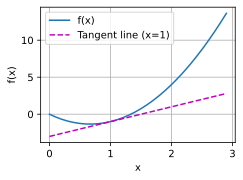

In [7]:
x=np.arange(0,3,0.1)
plot(x, [f(x),2*x-3],'x','f(x)', legend=['f(x)','Tangent line (x=1)'])

### Exercícios 
pg 71

1. Plot the function y=f(x)=x³−1/x and its tangent line when x=1.



A derivada é 
3x² + 1/x²

y=f(1)=0
então x0=1 y0=0

Df(x0)=3+1=4   <-a == coeficiente angular no x=1

y-y0=a(x-x0)
y-0 = 4(x-1)
y=4x-4

Reta tangente da Df(x) quando x=1   == y=4x-4


Calculadora derivada
https://pt.symbolab.com/solver/derivative-calculator/


/tmp/ipykernel_6200/785244225.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


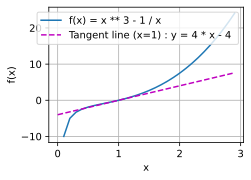

In [8]:
x = np.arange(0, 3, 0.1)
plot(x, [x ** 3 - 1 / x, 4 * x - 4], 'x', 'f(x)', legend=['f(x) = x ** 3 - 1 / x ', 'Tangent line (x=1) : y = 4 * x - 4 '])

2.Find the gradient of the functionf(x) = 3x²1+ 5e^x²
.

2.5 - pg 71


In [9]:
from mxnet import autograd, np, npx
npx.set_np()

x=np.arange(4.0)

x.attach_grad()
x,x.grad,np.dot(x,x)

(array([0., 1., 2., 3.]), array([0., 0., 0., 0.]), array(14.))

Dot Products de vetores é a soma dos produtos dos elementos na mesma posição


In [10]:
with autograd.record():
    y=2*np.dot(x, x)
y,np.dot(x,x)

(array(28.), array(14.))

In [11]:
y.backward()
x.grad

array([ 0.,  4.,  8., 12.])